In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [4]:
# read dataset
df_train = pd.read_csv("titanic_training.csv")
df_test = pd.read_csv("titanic_testing.csv")

In [5]:
def preprocess(df):
    df['Sex'] = df['Sex'].map({'female': 1, 'male': 0})
    df['Name'] = df['Name'].str.len()
    return df

In [6]:
df_train = preprocess(df_train)
df_test = preprocess(df_test)

In [7]:
X = df_train.iloc[:, 0:7].values # attributes/inputs
y = df_train['Survived'].values # output / needs to be predict
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#X.shape
#df_train.head

In [9]:
X_test = df_test.iloc[:, 0:7].values # attributes/inputs
y_test = df_test['Survived'].values # output / needs to be predict

In [10]:
#plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

In [11]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier(algorithm='SAMME',n_estimators=10,learning_rate=1.0)
abc.fit(X,y)
np.mean(cross_val_score(abc,X,y,scoring='accuracy',cv=5))

0.8102187286397813

In [12]:
abc.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=10)

In [27]:
# def plot_decision_boundary(clf):
#     plt.figure(figsize=(12, 8))
#     x_range = np.linspace(X_train.min(), X_train.max(), 100)
#     xx1, xx2 = np.meshgrid(x_range, x_range)
#     y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
#     y_hat = y_hat.reshape(xx1.shape)
#     plt.contourf(xx1, xx2, y_hat, alpha=0.2)
#     plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='viridis', alpha=.7)
#     plt.title("Adaboost Classifier")
#     plt.show()
    
# plot_decision_boundary(abc)

In [83]:
abc = AdaBoostClassifier(algorithm='SAMME',n_estimators=10,learning_rate=1.)
abc.fit(X_train,y_train)
np.mean(cross_val_score(abc,X_test,y_test,scoring='accuracy',cv=5))
#plot_decision_boundary(abc)

0.7358585858585859

In [84]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']


grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.810219 using {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 10}


In [75]:
abc_1 = AdaBoostClassifier(algorithm='SAMME',n_estimators=10,learning_rate=1.0)
abc_2 = AdaBoostClassifier(algorithm='SAMME',n_estimators=50,learning_rate=1.0)
abc_3 = AdaBoostClassifier(algorithm='SAMME',n_estimators=100,learning_rate=1.0)
abc_4 = AdaBoostClassifier(algorithm='SAMME',n_estimators=300,learning_rate=1.0)

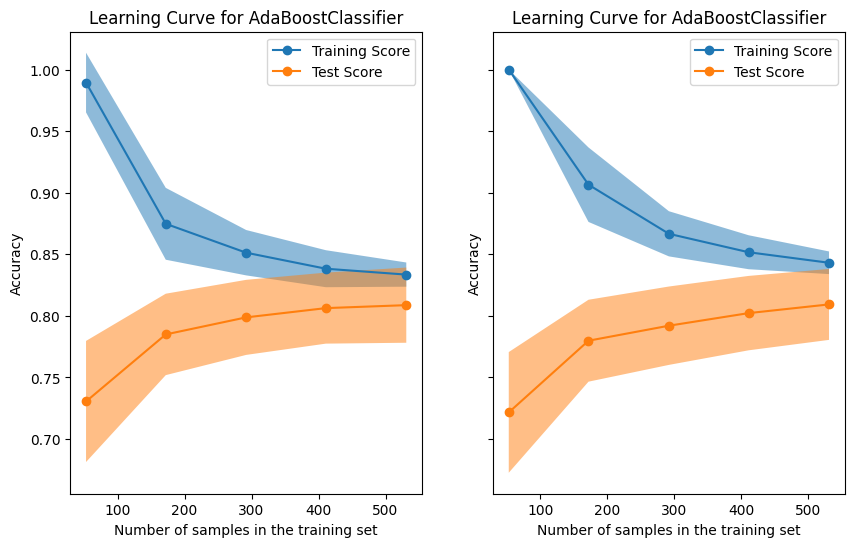

In [76]:
#plot learning curve
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=42),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([abc_3, abc_4]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")